In [16]:
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import networkx as nx
import pydot
import matplotlib.pyplot as plt
from dcss.plotting import custom_seaborn
import seaborn as sns
custom_seaborn()
contact_diaries = pd.read_csv("../data/Contact-diaries-network_data_2013.csv", sep = ' ')

In [17]:
contact_diaries.head()
contact_diaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   i       502 non-null    int64
 1   j       502 non-null    int64
 2   weight  502 non-null    int64
dtypes: int64(3)
memory usage: 11.9 KB


In [10]:
G = nx.from_pandas_edgelist(contact_diaries, 'i', 'j', create_using=nx.Graph())
G.name = 'Contactos reportados (Datos de los diarios)'
print(G)
print('Número de nodos', len(G.nodes))
print('Número de bordes', len(G.edges))
print('Promedio de grados de separación', sum(dict(G.degree).values())/len(G.nodes))

Graph named 'Contactos reportados (Datos de los diarios)' with 120 nodes and 348 edges
Número de nodos 120
Número de bordes 348
Promedio de grados de separación 5.8


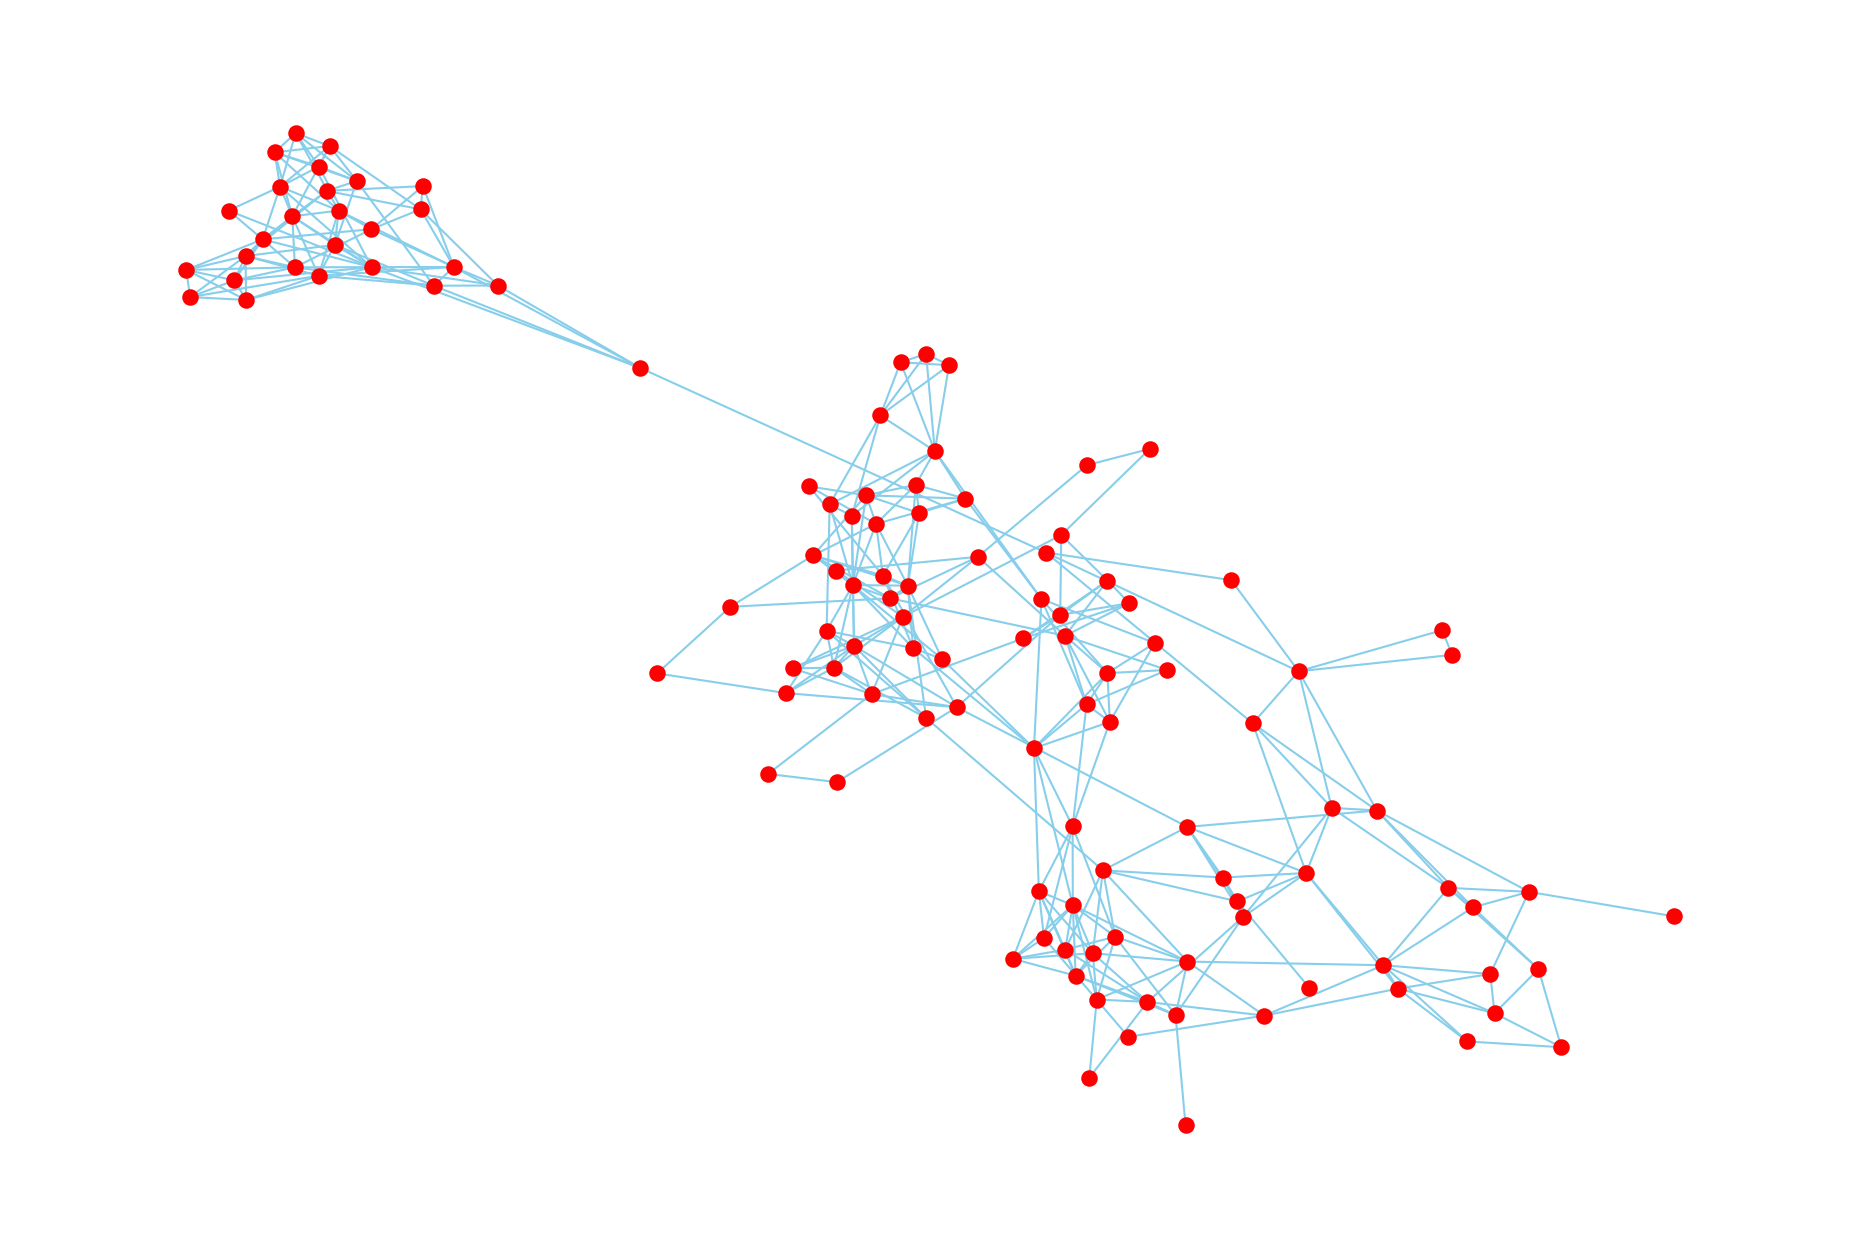

In [34]:
nx.draw_spring(G, with_labels = None, node_color="red", edge_color="skyblue", node_size=10, width=.5)

In [25]:
import pandas as pd
pd.set_option("display.notebook_repr_html", False)
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
import networkx as nx
from community import community_louvain
from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.triads import triadic_census
import community
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
from dcss.plotting import format_axes_commas, custom_seaborn
custom_seaborn()
import igraph as ig
import leidenalg as la

In [27]:
contact_diaries = pd.read_csv("../data/Contact-diaries-network_data_2013.csv", sep=' ')
G = nx.from_pandas_edgelist(contact_diaries, 'i', 'j', create_using=nx.Graph())
G.name = 'Contactos reportados (Datos de los diarios)'
print(G)
print('Número de nodos', len(G.nodes))
print('Número de bordes', len(G.edges))
print('Promedio de grados de separación', sum(dict(G.degree).values())/len(G.nodes))

Graph named 'Contactos reportados (Datos de los diarios)' with 120 nodes and 348 edges
Número de nodos 120
Número de bordes 348
Promedio de grados de separación 5.8


In [28]:
contact_diaries.j.unique()[:5]

array([ 28, 106, 147, 177, 295])

In [30]:
from networkx.algorithms.triads import triadic_census

In [32]:
gn_50 = nx.gn_graph(50, seed = 42)
sim_50 = pd.Series(triadic_census(gn_50))
sim_50

003     17464
012      1920
102         0
021D        0
021U      184
021C       32
111D        0
111U        0
030T        0
030C        0
201         0
120D        0
120U        0
120C        0
210         0
300         0
dtype: int64

In [33]:
gn = nx.gn_graph(20, seed = 42)
gn.name = "Gráfico simulado con 20 nodos"
def describe_simulated_network(network):
    print(f'Network: {network.name}')
    print(f'Number of nodes: {network.number_of_nodes()}')
    print(f'Number of edges: {network.number_of_edges()}')
    print(f'Density: {nx.density(network)}')

describe_simulated_network(gn)

Network: Gráfico simulado con 20 nodos
Number of nodes: 20
Number of edges: 19
Density: 0.05


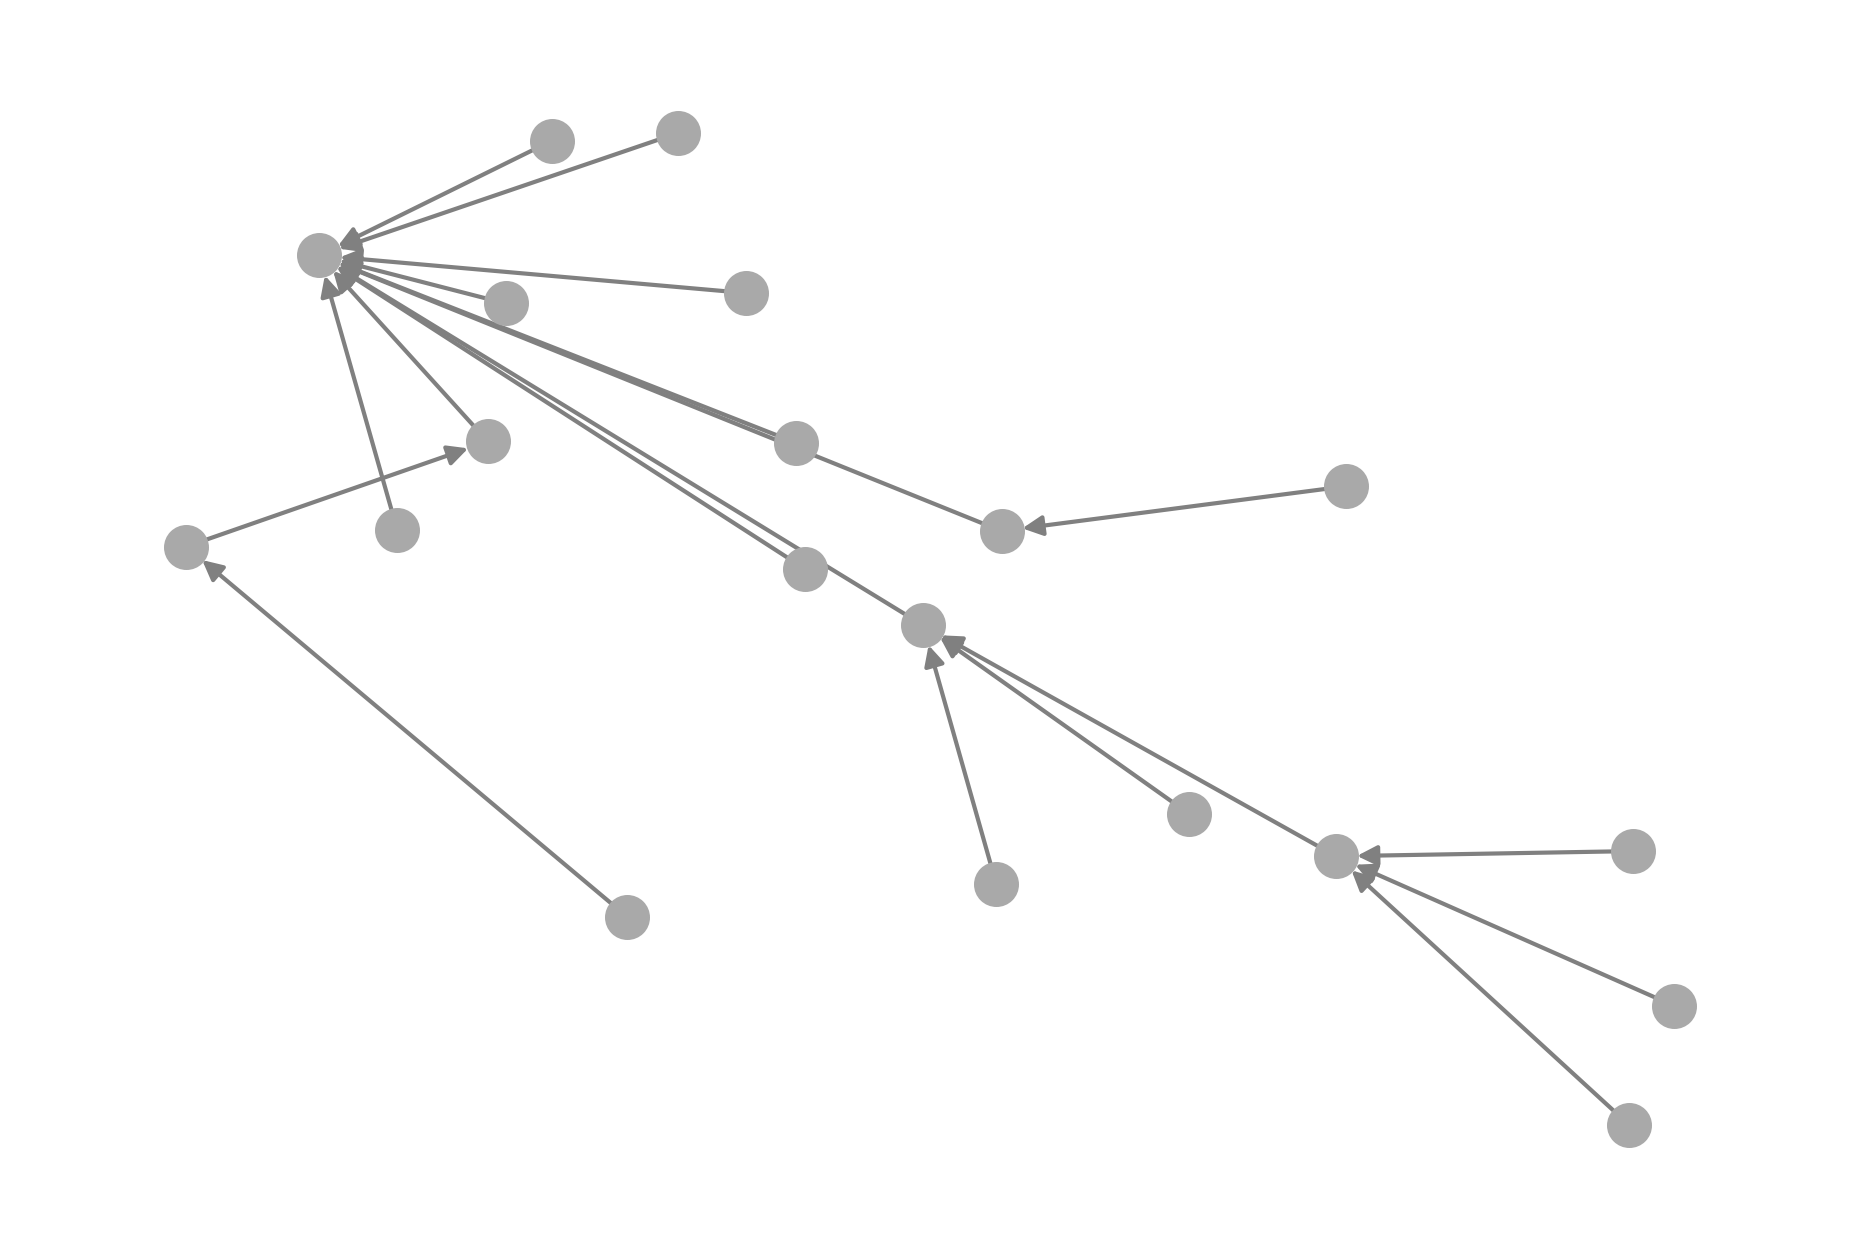

In [35]:
layout =nx.fruchterman_reingold_layout(gn, seed=12)
nx.draw(gn, layout, node_color='darkgray', edge_color='gray', node_size=100, width=1)
plt.show()

In [36]:
sim_20_a = pd.Series(triadic_census(gn))
sim_20_a

003     858
012     222
102       0
021D      0
021U     51
021C      9
111D      0
111U      0
030T      0
030C      0
201       0
120D      0
120U      0
120C      0
210       0
300       0
dtype: int64